In [1]:
# -*- coding:utf-8 -*-
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
tm_vin=pd.read_csv('tm_vin.csv')
vin_vehicleCode=pd.read_csv('vin.csv')
version=pd.read_csv('feature_list_version.csv')
feature=pd.read_csv('tm_feature.csv')

In [3]:
#this is our data from shanghai insurence company
#few of them may be wrong,but just a few.
print len(vin_vehicleCode)
vin_vehicleCode.head(10)

83443


,RACK_NO,VEHICLE_MODEL,VEHICLE_CODE,A8,A13
0,LSJW26H38AS072686,荣威CSA7182AC,RWAABD0025,LSJW26H3,S07
1,LSJA16E36AG034975,荣威CSA7150MC,RWAACD0001,LSJA16E3,G03
2,LSJW26H34AS075018,荣威CSA7182AC,RWAABD0025,LSJW26H3,S07
3,LSJW26H34AS082888,荣威CSA7182MC轿车,RWAABD0027,LSJW26H3,S08
4,LSJW26G31BS062228,荣威CSA7181AC,RWAABD0007,LSJW26G3,S06
5,LSJW24H36BS058470,名爵CSA7184AC,MJBADD0011,LSJW24H3,S05
6,LSJZ14E35BS056682,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S05
7,LSJZ14E34BS057645,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S05
8,LSJA16E35BG030207,荣威CSA7150MC,RWAACD0001,LSJA16E3,G03
9,LSJZ14E31BS062947,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S06


In [4]:
#this is the EPC from the company 
print len(tm_vin)
tm_vin.head(10)

1588209


,VIN_ID,VIN_CODE,MODEL_YEAR,MATERIEL_CODE,MODEL_CODE,AS_MODEL_CODE,PLATFORM_CODE,FEATURE_LIST_VERSION_ID
0,248,LSJW26765GS059964,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
1,249,LSJW26760GS059967,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
2,250,LSJW26763GS060241,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
3,251,LSJW26760GS059970,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
4,252,LSJW26765GS060242,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
5,253,LSJW26767GS060243,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
6,254,LSJW26766GS059973,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
7,255,LSJW26769GS060244,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
8,256,LSJW2676XGS059975,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262
9,257,LSJW26763GS059977,0,RIG2LT59BDCPBB,RI2SP1,NaN,荣威550 12款-,3262


In [5]:
#this is what we want to show to the insurane company
vehicle_code=pd.read_csv('vehicle_code.csv')
vehicle_code.head(10)

,VEHICLE_CODE,VEHICLE_DESCRIPTION,R_VEHICLE_NAME,R_VEHICLE_BRAND,R_IMPORT_FLAG,R_VEHICLE_FAMILY,R_MARKET_DATE,CREATE_TIME,UPDATE_TIME
0,RWAAAD0032,"轿车,自动档 贵雅版 国Ⅲ",荣威CSA7250AB-GD轿车,荣威,国产,荣威750,200903.0,NaN,2012/1/4 16:24:25
1,RWAAAD0047,"轿车,手动档 商雅版 涡轮增压 国Ⅲ",荣威CSA7180MB-DL轿车,荣威,国产,荣威750,200903.0,NaN,2012/1/4 16:24:25
2,RWAAAD0014,"轿车,自动档 周年纪念版",荣威CSA7250AA-GD轿车,荣威,国产,荣威750,200709.0,NaN,2017/1/11 9:42:42
3,RWAAAD0008,"轿车,手动档 国Ⅲ 未批量上市",荣威CSA7180MB-S轿车,荣威,国产,荣威750,200612.0,NaN,2017/1/11 9:42:55
4,RWAAAD0038,"轿车,自动档 迅雅版 涡轮增压 国Ⅲ",荣威CSA7180AB-DL轿车,荣威,国产,荣威750,200903.0,NaN,2012/1/4 16:24:25
5,RWAAAD0031,"轿车,自动档 贵雅版 国Ⅲ不带OBD",荣威CSA7250AA-GD轿车,荣威,国产,荣威750,200903.0,NaN,2012/1/4 16:24:25
6,RWAAAD0033,"轿车,自动档 贵雅版 国Ⅳ",荣威CSA7250AC-GD轿车,荣威,国产,荣威750,200903.0,NaN,2012/1/4 16:24:25
7,RWAAAD0022,"轿车,自动档 贵雅型 V6 国Ⅳ",荣威CSA7250AC-GD轿车,荣威,国产,荣威750,200804.0,NaN,2012/1/4 16:24:23
8,RWAAAD0006,"轿车,手动档 国Ⅲ 未批量上市",荣威CSA7180MB-DL轿车,荣威,国产,荣威750,200612.0,NaN,2017/1/11 9:42:23
9,RWAAAD0027,"轿车,自动档 商雅版 涡轮增压 国Ⅲ",荣威CSA7180AB-DL轿车,荣威,国产,荣威750,200806.0,NaN,2012/1/4 16:24:23


In [6]:
print vehicle_code['VEHICLE_CODE'].is_unique
print 'we have different kinds of vehicle code from the EPC:',len(vehicle_code)

True
we have different kinds of vehicle code from the EPC: 505


In [7]:
#the number of vehicle code from the original data of insurance company
vin4=vin_vehicleCode.groupby('VEHICLE_CODE',as_index=False)['VEHICLE_MODEL'].count()

print 'how many vehicle codes  from the insurance company:',len(vin4)
#the number of vehicle code which have no more than 10 cars for each vehicle code
# print 'how many vehicle code which have no more than 10 cars from the insurance company:',len(vin4[vin4['VEHICLE_MODEL']<=1])
# print vin4.sort('VEHICLE_MODEL')

# easy code to show 
# print vin_vehicleCode['VEHICLE_CODE'].value_counts()
print 'how many vehicle code which have no more than 10 cars from the insurance company:',np.sum(vin_vehicleCode['VEHICLE_CODE'].value_counts()<2)

how many vehicle codes  from the insurance company: 485
how many vehicle code which have no more than 10 cars from the insurance company: 134


In [8]:
vin_vehicleCode

,RACK_NO,VEHICLE_MODEL,VEHICLE_CODE,A8,A13
0,LSJW26H38AS072686,荣威CSA7182AC,RWAABD0025,LSJW26H3,S07
1,LSJA16E36AG034975,荣威CSA7150MC,RWAACD0001,LSJA16E3,G03
2,LSJW26H34AS075018,荣威CSA7182AC,RWAABD0025,LSJW26H3,S07
3,LSJW26H34AS082888,荣威CSA7182MC轿车,RWAABD0027,LSJW26H3,S08
4,LSJW26G31BS062228,荣威CSA7181AC,RWAABD0007,LSJW26G3,S06
5,LSJW24H36BS058470,名爵CSA7184AC,MJBADD0011,LSJW24H3,S05
6,LSJZ14E35BS056682,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S05
7,LSJZ14E34BS057645,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S05
8,LSJA16E35BG030207,荣威CSA7150MC,RWAACD0001,LSJA16E3,G03
9,LSJZ14E31BS062947,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S06


In [9]:
#check wheather all the vehicle code from the insurance company is in the EPC
# all(xx in vin4['VEHICLE_CODE'] if xx in vehicle_code)

In [10]:
# let us have a look at the feature list version csv and the feature list
feature_list_version= pd.read_csv('FEATURE_LIST_VERSION.csv')
print 'we have different features:',len(feature_list_version)
feature_list_version.head(20)

we have different features: 4522


,NUM,FEATURE_LIST_VERSION_ID,PLATFORM_CODE,FEATURE_LIST
0,0,3269,荣威550 12款-,20153A176OSC7676A005A10SA11AA12AA30SA40DA90XB0...
1,1,3272,荣威360,20153A176ESC76E3A009A10SA30DA40DA90XB00LC00NC0...
2,2,3277,荣威RX5,20163A176ASA74U6A00MA10AA11AA205A21LA30CA40DAA...
3,3,3278,荣威RX5,20163A176ASA74U3A00MA10AA11AA205A21LA30CA40DB0...
4,4,3279,荣威RX5,20163A176ASA74W6A00MA10AA11AA205A21LA30CA40DAA...
5,5,3280,荣威RX5,20163A176VSA74W9A00MA10AA11AA205A21LA30HA40DAA...
6,6,3281,荣威RX5,20163A176ESC74U6A00MA10AA11AA205A21LA30CA40DAA...
7,7,3283,荣威RX5,20163A176ASA74U3A00MA10AA11AA205A21LA30CA40DB0...
8,8,3285,荣威RX5,20163A176ASA74U3A00MA10AA11AA205A21LA30CA40DB0...
9,9,3286,MGGS,20153A176ASA74U6A00MA10AA11AA205A30CA40DA90XAA...


In [11]:
print feature_list_version['FEATURE_LIST'][0]
print 'the length of feature list',len(feature_list_version['FEATURE_LIST'][0])

20153A176OSC7676A005A10SA11AA12AA30SA40DA90XB00LC00NC06XC08HC09CC0AXC21AC40PC607C90XC91XD00GD01MD12AE50XE55XF00EF10LF11BF15EG00MG10NH10KH11XH12BH30EJ00FJ05JJ10PJ15JJ17PK16BK19AK203K27CK50XK61BK65LL10AL15AL18CL20AM05DM10DM14FM26AM27XM30NM31XM35AM40LM42CM43CM45XM52XM53CM70CN00AN02BN06AN101N13MN202N22BN45XN50FN61XN62MN68AN69XQ00BQ01BQ06AQ09AQ125Q19RQ20RQ26CR00KR03AR25XS00HS01XS02FS04BS05XS07XS10XS11XS14GS15DS16DS17XS18AS25CS29XS35SS37BS40PS42XS45XS53AS57XS68AT11HT14XT20XT21VU00LU01DU039U04AU056U0BVU10AU11NU35RU40XU41XZ10CZ15A
the length of feature list 528


In [12]:
#now we want to interpret the feature list to mapping the vehicle code

#1-4:   2     year
#5-8:   3     export country
#4bits: 5     colour 
#4bits: 6     inside colour
#4bits: 7     vin
#3-4bits:A00  car style

tm_feature = pd.read_csv('tm_feature.csv')
tm_feature[0:50]

,FEATURE_ID,FEATURE_CODE,FAMILY_CODE,FEATURE_EN_NAME,FEATURE_CN_NAME,NUM
0,132,2004,2,2004 M/Y,2004车型年,0
1,133,2005,2,2005 M/Y,2005车型年,1
2,134,2006,2,2006 M/Y,2006车型年,2
3,135,2007,2,2007 M/Y,2007车型年,3
4,136,2008,2,2008 M/Y,2008车型年,4
5,137,2009,2,2009 M/Y,2009车型年,5
6,772,2011,2,2011 M/Y,2011车型年,6
7,1302,2012,2,2012 M/Y,2012 车型年,7
8,1353,2010,2,2010 M/Y,2010车型年,8
9,891,2013,2,2013 M/Y,2013 车型年,9


In [13]:
# we want to have a look at the number of levels for each family code(categorical feature)
b = tm_feature.groupby('FAMILY_CODE',as_index=False).count()
b

,FAMILY_CODE,FEATURE_ID,FEATURE_CODE,FEATURE_EN_NAME,FEATURE_CN_NAME,NUM
0,2,16,16,16,16,16
1,3,25,25,25,25,25
2,5,91,91,91,91,91
3,6,21,21,21,21,21
4,7,111,111,111,111,111
5,A00,37,37,37,37,37
6,A01,1,1,1,1,1
7,A02,1,1,1,1,1
8,A03,1,1,1,1,1
9,A05,4,4,4,4,4


In [14]:
print type(b)
print 'we have different features from the feature list corresponding to each vin code: ',len(b)

<class 'pandas.core.frame.DataFrame'>
we have different features from the feature list corresponding to each vin code:  349


In [15]:
## filter the feature with family code

#b['FAMILY_CODE']
# i=0
# # b['FAMILY_CODE'][i]
# i=i+1
# print b['FAMILY_CODE'][i]
# tm_feature[tm_feature['FAMILY_CODE']==b['FAMILY_CODE'][i]]
#tm_feature[tm_feature['FAMILY_CODE']=='A10']

In [16]:
##check the information from the insurance company and the EPC database
#WE want to use this information to construct a tranning data: featuers(from feature list vesrsion id to feature list,then to 
#feature) and Vehicle_Code(as lable)
vin_conbined=pd.merge(vin_vehicleCode,tm_vin,left_on='RACK_NO',right_on='VIN_CODE',how='inner')
print 'the num of obsevations from the insurance compay acturall in our EPC database:',len(vin_conbined), '\n'
print 'we have the obsevations from the insurance company:',len(vin_vehicleCode)
#some of the rack_code from the insurance company is not exist in our EPC database
vin_conbined.head(10)

the num of obsevations from the insurance compay acturall in our EPC database: 79389 

we have the obsevations from the insurance company: 83443


,RACK_NO,VEHICLE_MODEL,VEHICLE_CODE,A8,A13,VIN_ID,VIN_CODE,MODEL_YEAR,MATERIEL_CODE,MODEL_CODE,AS_MODEL_CODE,PLATFORM_CODE,FEATURE_LIST_VERSION_ID
0,LSJW26H38AS072686,荣威CSA7182AC,RWAABD0025,LSJW26H3,S07,526059,LSJW26H38AS072686,0,RI92LC32E3CASC,RI2CP1,NaN,荣威550,1000036275
1,LSJA16E36AG034975,荣威CSA7150MC,RWAACD0001,LSJA16E3,G03,371394,LSJA16E36AG034975,0,RA01LT12K1DWSA,RA1SP1,NaN,荣威350,1000036114
2,LSJW26H34AS075018,荣威CSA7182AC,RWAABD0025,LSJW26H3,S07,150190,LSJW26H34AS075018,0,RI92LC12E3CRSB,RI2CP1,NaN,荣威550,1000035772
3,LSJW26H34AS082888,荣威CSA7182MC轿车,RWAABD0027,LSJW26H3,S08,154379,LSJW26H34AS082888,0,RI92LT32E1CDSB,RI2SP1,NaN,荣威550,1000035782
4,LSJW26G31BS062228,荣威CSA7181AC,RWAABD0007,LSJW26G3,S06,575513,LSJW26G31BS062228,0,RI02LD12C3DMBB,RI2DP1,NaN,荣威550,1000036386
5,LSJW24H36BS058470,名爵CSA7184AC,MJBADD0011,LSJW24H3,S05,253298,LSJW24H36BS058470,0,MIB2FT82E3CNSB,RI2SP2,NaN,MG6,1000035960
6,LSJZ14E35BS056682,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S05,318985,LSJZ14E35BS056682,0,MZ01FC12K9CZAA,RZ1CP2,NaN,MG3,1000036063
7,LSJZ14E35BS056682,名爵CSA7153AC轿车,MJBAED0004,LSJZ14E3,S05,318985,LSJZ14E35BS056682,0,MZ01FC12K9CZAA,RZ1CP2,NaN,MG3,1000036063
8,LSJZ14E34BS057645,名爵CSA7153AC,MJBAED0004,LSJZ14E3,S05,185826,LSJZ14E34BS057645,0,MZ01FC12K9DNDW,RZ1CP2,NaN,MG3,1000035839
9,LSJZ14E34BS057645,名爵CSA7153AC轿车,MJBAED0004,LSJZ14E3,S05,185826,LSJZ14E34BS057645,0,MZ01FC12K9DNDW,RZ1CP2,NaN,MG3,1000035839


In [17]:
#we want to try to find the vehicle code with the vin code from the insurance company
#if it is in the EPC database:
#but no vehicle code is directly matched, we want to predict the vehicle code by classification method with the corresponding 
#featues.so we can search in the EPC database to find the feature list by vin code and interpret it as the correspongding features
#which can help us to predict the vehicle code we had.

#first,we need to construct a trainning data from the data of insurance company,and trainning a 'good' algorithm to predict:
#interpret the feature list into lots of features for each car from insurance company, then make it as trainning data to construct some alogrithm to predict 


#but if the vin code from the insurance company is not in the EPC database(becaues of the delay of database):
#we cannt get the featuers from our EPC database,then we have to predict the vehicle code just by vin code. one way is just treat the vin code as one singel feature to predict,
#another way is to interpret the vin code into meanningful features to predict.(the question is how?)

In [18]:
# vin2=vin1[['VEHICLE_CODE','FEATURE_LIST_VERSION_ID']]
# print len(vin2)
# vin2.head(10)

In [19]:
# vin2['num']=0
# vin2.head(10)

In [20]:
# vin3=vin1.groupby(['FEATURE_LIST_VERSION_ID','VEHICLE_CODE'],as_index=False)['VEHICLE_MODEL'].count()
# print len(vin3)
# vin3.head(10)
#we find the vehicle code is not unique for each feature list version 

#vin3['num']=vin3['num'].astype(int)
#vin3[['FEATURE_LIST_VERSION_ID','VEHICLE_CODE','NUM']].head(10)

In [21]:
#now we want to construct a trainning data with 79389 obsevations (actually in the EPC database)and 349 features and the vehicle code as label
vin_conbined.head()
raw_data =vin_conbined[['RACK_NO','VEHICLE_CODE','VEHICLE_MODEL','PLATFORM_CODE','FEATURE_LIST_VERSION_ID']]
print len(raw_data)
raw_data =pd.merge(raw_data,feature_list_version,on='FEATURE_LIST_VERSION_ID')
print  'construct a trainning data with 79389 obsevations (actually in the EPC database',len(raw_data)
raw_data.head()

79389
construct a trainning data with 79389 obsevations (actually in the EPC database 79389


,RACK_NO,VEHICLE_CODE,VEHICLE_MODEL,PLATFORM_CODE_x,FEATURE_LIST_VERSION_ID,NUM,PLATFORM_CODE_y,FEATURE_LIST
0,LSJW26H38AS072686,RWAABD0025,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
1,LSJW26H36AS073027,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
2,LSJW26H34AS080560,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
3,LSJW26H38AS075748,RWAABD0023,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
4,LSJW26H38AS075748,RWAABD0023,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...


In [22]:
#set the column of the train data
dict_column = tm_feature.groupby('FAMILY_CODE',as_index=False).count()['FAMILY_CODE']
dict_column= list(dict_column)
print type(dict_column)
print len(dict_column)
#print dict_column


#set the empty train data frame
train_data = pd.DataFrame(columns=dict_column)
train_data_CN = pd.DataFrame(columns=dict_column)
print train_data

<type 'list'>
349
Empty DataFrame
Columns: [2, 3, 5, 6, 7, A00, A01, A02, A03, A05, A10, A11, A12, A20, A21, A30, A40, A90, B00, C00, C01, C02, C05, C06, C07, C08, C09, C0A, C0B, C10, C20, C21, C30, C40, C50, C60, C90, C91, D00, D01, D10, D12, D20, D70, E00, E02, E03, E05, E10, E20, E40, E50, E55, E56, F00, F05, F09, F10, F11, F12, F13, F15, G00, G10, G30, G40, G50, H00, H10, H11, H12, H15, H16, H20, H30, H40, J00, J04, J05, J10, J15, J16, J17, J20, J21, J22, K05, K06, K07, K10, K11, K14, K15, K16, K17, K18, K19, K20, K21, K22, ...]
Index: []

[0 rows x 349 columns]


In [23]:
# coding:utf-8
#then we want to interpret the feature list into 349 features
print  'we show one sample to interpre the feature list to 349 features:'
sample = raw_data['FEATURE_LIST'][0]
print sample
type(sample)
len(sample)
sample[4:8]
length =len(sample)

temp = tm_feature[tm_feature['FEATURE_CODE']==sample[0:0+4]]['FEATURE_CN_NAME']
print temp[temp.index[0]]
# print type(tm_feature[tm_feature['FEATURE_CODE']==sample[0:0+4]]['FEATURE_CN_NAME'])
# print tm_feature[tm_feature['FEATURE_CODE']==sample[0:0+4]]['FEATURE_CN_NAME'] # it output a series with index
#     index =tm_feature[tm_feature['FEATURE_CODE']==sample[0:0+4]].index

for x in range(0,len(sample),4):
         print x, sample[x:x+4],
         print tm_feature[tm_feature['FEATURE_CODE']==sample[x:x+4]]['FEATURE_CN_NAME']      

we show one sample to interpre the feature list to 349 features:
20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC09CC10HC40VC91XD00GD01ME00TE55AF10LF11BF15KG10NH10DH12BH15AJ00FJ05EJ10PJ15AK19AK202K61BL10AL15AL18CL20AM05DM10DM19PM26AM27CM35AM40LM42CM43CN00AN06BN101N13MN22AN50LN62MN68AQ00BQ123Q19RS00PS15DS16DS35SS40PS42AT11AU00LU01UU039U04AU058U11XU35RZ10C
2009车型年
0 2009 5    2009车型年
Name: FEATURE_CN_NAME, dtype: object
4 3A17 20    中国
Name: FEATURE_CN_NAME, dtype: object
8 6ASA 133    深色
Name: FEATURE_CN_NAME, dtype: object
12 76H3 162    VIN 003
Name: FEATURE_CN_NAME, dtype: object
16 A00U 283    W-汽车
Name: FEATURE_CN_NAME, dtype: object
20 A10S 311    轿车
Name: FEATURE_CN_NAME, dtype: object
24 A40D 340    国内
Name: FEATURE_CN_NAME, dtype: object
28 B00L 348    左驾
Name: FEATURE_CN_NAME, dtype: object
32 C00H 360    1.8L VCT 双凸轮轴汽油机
Name: FEATURE_CN_NAME, dtype: object
36 C06C 402    巡航控制
Name: FEATURE_CN_NAME, dtype: object
40 C08T 419    欧-IV
Name: FEATURE_CN_NAME, dtype: object
44 C09C 4

In [24]:
#samle is a feature list
temp_data = pd.DataFrame(np.nan, index=[0],columns=dict_column)
temp_data_CN = pd.DataFrame(np.nan, index=[0],columns=dict_column)

feature_list = raw_data['FEATURE_LIST'][0]
# print type(feature_list)
# print feature_list
# print temp_data
# print type(dict_column)
# print type(feature_list[0])
count =0
for xx in range(0,len(feature_list),4):
    
    if (feature_list[xx] in ['2','3','5','6','7']) and (count <=6):
        count = count+1
        feature =feature_list[xx]
        feature_code =feature_list[xx:xx+4]
        #print xx,count,feature_code
        #print feature_code
        
        if tm_feature[tm_feature['FEATURE_CODE']==feature_code].values.shape[0]==0:
            #some feature_code like 76E3 in 279th observation ,but not exsit in the tm_feature['FEATURE_CODE], we assume it is just the correce 
            #feature_code,but fail to find the chinese feature name
            if tm_feature[tm_feature['FEATURE_CODE']==feature_code[0:3]].values.shape[0]==0:
                temp_data[feature] = np.nan
                temp_data_CN[feature]= np.nan
                          
            #some feature_code lke G10N in 0th observation, but not exsit in the tm_feature['FEATURE_CODE],
            #we assume it is the same as G10    
            else:
                temp_data[feature] = feature_code[0:3]
                temp_data_CN[feature]= feature_code[0:3]
         
        #print feature_code
        else:
            temp_data[feature] = feature_code
            #print feature_code, tm_feature[tm_feature['FEATURE_CODE']==feature_code]
            temp_data_CN[feature]= tm_feature[tm_feature['FEATURE_CODE']==feature_code].values[(0,4)]
            #.values which change a data frame into np array

    elif any(feature_list[xx:xx+3] == x for x in dict_column):
        #print any(feature_list[xx:xx+3] == x for x in dict_column)
        feature = feature_list[xx:xx+3]
        feature_code = feature_list[xx:xx+4]
        
        if tm_feature[tm_feature['FEATURE_CODE']==feature_code].values.shape[0]==0:
            #some feature_code like 76E3 in 279th observation ,but not exsit in the tm_feature['FEATURE_CODE], 
            #2017/7/18 now I find the error is come from the transformation from database to csv, 
            #76E3 will be transformed into scientific notation 7.60E+04
            #76E9 will be transformed into scientific notation 7.60E+10
            
            # 76E6    7.60E+07
            #74E3 will be transformed into scientific notation 7.40E+04
            # 74E4    7.40E+05


            #so when we transform the data fromthe database to csv file, we need to make sure the data tape as string 
            
            
            
            #we assume it is just the correce 
            #feature_code,but fail to find the chinese feature name
            if tm_feature[tm_feature['FEATURE_CODE']==feature_code[0:3]].values.shape[0]==0:
                print 'feature code is not exist: '+ featrue_code
                temp_data[feature] = np.nan
                temp_data_CN[feature]= np.nan
                
                
            #some feature_code lke G10N in 0th observation, but not exsit in the tm_feature['FEATURE_CODE],
            #we assume it is the same as G10    
            else:
                temp_data[feature] = feature_code[0:3]
                temp_data_CN[feature]= feature_code[0:3]
         
        #print feature_code
        else:
            temp_data[feature] = feature_code
            #print feature_code, tm_feature[tm_feature['FEATURE_CODE']==feature_code]
            temp_data_CN[feature]= tm_feature[tm_feature['FEATURE_CODE']==feature_code].values[(0,4)]
            #.values which change a data frame into np array
            
        #print type(tm_feature[tm_feature['FEATURE_CODE']==feature_code]),feature_code
        #print tm_feature[tm_feature['FEATURE_CODE']==feature_code].values.shape[0]
    
                  
    
#     print temp
#     print type(temp)
    #print str(temp[temp.index[0]])# a wierd situation here
    #print temp[0:1]
    #temp_data_CN[feature]= tempCN
    
#the feature code version of feature for one car
print temp_data
#the chinese verion of feature for one car
print temp_data_CN


# we can use other 'FEATURE_CN_CHINA' OR 'NUM' HERE         

      2     3   5     6     7   A00  A01  A02  A03  A05 ...   U35  U40  U41  \
0  2009  3A17 NaN  6ASA  76H3  A00U  NaN  NaN  NaN  NaN ...  U35R  NaN  NaN   

   U42  Z00   Z10 Z15  Z16 Z90 Z99  
0  NaN  NaN  Z10C NaN  NaN NaN NaN  

[1 rows x 349 columns]
         2   3   5   6        7   A00  A01  A02  A03  A05 ...       U35  U40  \
0  2009车型年  中国 NaN  深色  VIN 003  W-汽车  NaN  NaN  NaN  NaN ...  方向盘带音量调节  NaN   

   U41  U42  Z00  Z10 Z15  Z16 Z90 Z99  
0  NaN  NaN  NaN   汉语 NaN  NaN NaN NaN  

[1 rows x 349 columns]


# To improve the efficiency of interpret the vin code into the features 


In [25]:
feature_list_raw_data = raw_data['FEATURE_LIST']

In [26]:
# #now we want to do the same process to every car from the insurance company to build a train data, extract every car' feature list into a 
# #dataframe 
# num_vehicle = len(raw_data)
# #set the timer
# import timeit
# start_time= timeit.default_timer()

# #test for a few observations
# # num_vehicle_test=2000

# #training for the whole data
# num_vehicle_test = num_vehicle



# for x in range(num_vehicle_test):
#     #set a empty temp_data for each vehicle
#     temp_data = pd.DataFrame(np.nan, index=[0],columns=dict_column)
#     temp_data_CN = pd.DataFrame(np.nan, index=[0],columns=dict_column)
#     #choose the feature list for each vehicle
    
# #     feature_list = raw_data['FEATURE_LIST'][x]
#     feature_list = feature_list_raw_data[x]  # which make you do not need to read the whole table each time
    
#     #extract the features from the feature_list for each vehicle into the dataframe named temp_data or temp_data_CN
#     count =0
    
    
#     for xx in range(0,len(feature_list),4):

#         if (feature_list[xx] in ['2','3','5','6','7']) and (count <=6):
#             count = count+1
#             feature =feature_list[xx]
#             feature_code =feature_list[xx:xx+4]
#             #print xx,count,feature_code
#             #print feature_code

#             if tm_feature[tm_feature['FEATURE_CODE']==feature_code].values.shape[0]==0:
#                 #some feature_code like 76E3 in 279th observation ,but not exsit in the tm_feature['FEATURE_CODE], we assume it is just the correce 
#                 #feature_code,but fail to find the chinese feature name
#                 if tm_feature[tm_feature['FEATURE_CODE']==feature_code[0:3]].values.shape[0]==0:
#                     temp_data[feature] = np.nan
#                     temp_data_CN[feature]= np.nan

#                 #some feature_code lke G10N in 0th observation, but not exsit in the tm_feature['FEATURE_CODE],
#                 #we assume it is the same as G10    
#                 else:
#                     temp_data[feature] = feature_code[0:3]
#                     temp_data_CN[feature]= feature_code[0:3]

#             #print feature_code
#             else:
#                 temp_data[feature] = feature_code
#                 #print feature_code, tm_feature[tm_feature['FEATURE_CODE']==feature_code]
#                 temp_data_CN[feature]= tm_feature[tm_feature['FEATURE_CODE']==feature_code].values[(0,4)]
#                 #.values which change a data frame into np array

#         elif any(feature_list[xx:xx+3] == x for x in dict_column):
#             #print any(feature_list[xx:xx+3] == x for x in dict_column)
#             feature = feature_list[xx:xx+3]
#             feature_code = feature_list[xx:xx+4]

#             if tm_feature[tm_feature['FEATURE_CODE']==feature_code].values.shape[0]==0:
#                 #some feature_code like 76E3 in 279th observation ,but not exsit in the tm_feature['FEATURE_CODE], 
#                 #2017/7/18 now I find the error is come from the transformation from database to csv
                
#                 #we assume it is just the correce feature_code,but fail to find the chinese feature name
#                 if tm_feature[tm_feature['FEATURE_CODE']==feature_code[0:3]].values.shape[0]==0:
#                     temp_data[feature] = np.nan
#                     temp_data_CN[feature]= np.nan


#                 #some feature_code lke G10N in 0th observation, but not exsit in the tm_feature['FEATURE_CODE],
#                 #we assume it is the same as G10    
#                 else:
#                     temp_data[feature] = feature_code[0:3]
#                     temp_data_CN[feature]= feature_code[0:3]

#             #print feature_code
#             else:
#                 temp_data[feature] = feature_code
#                 #print feature_code, tm_feature[tm_feature['FEATURE_CODE']==feature_code]
#                 temp_data_CN[feature]= tm_feature[tm_feature['FEATURE_CODE']==feature_code].values[(0,4)]
#                 #.values which change a data frame into np array
   
#     #test temp_data every 100 obsevations    
#     if x%100==0:
#         print x,temp_data_CN    
#     #append the temp data into the big train data
#     train_data = train_data.append(temp_data)
#     train_data_CN=train_data_CN.append(temp_data_CN)
    
# end_time= timeit.default_timer()
# run_time =end_time-start_time
# print run_time

    

In [27]:
# run_time = 144652.977632 =1.6742242781509526 days
# #because the data is huge,we want to save it into csv file to resues later
# train_data.to_csv('train_data.csv',encoding='utf-8',index= False)
# train_data_CN.to_csv('train_data_CN.csv',encoding='utf-8',index= False)


# we can read the train data from the file we stored befor then you dont need to run the code above to generate the train data
train_data= pd.read_csv('train_data.csv') 
# when we store a table ,we will store the index into the 1st column,so when we read,we need to tell the computer which column is index column 
# train_data= pd.read_csv('train_data.csv',index_col=0)

train_data_CN =pd.read_csv('train_data_CN.csv')

# saving datafames to an excel workbook
# writer = pd.ExcelWriter('train_data.xlsx')
# train_data.to_excel(writer,'sheet1')
# writer.save()
# train_data.columns
# train_data.drop(train_data.columns[0],inplace= True,axis =1)
train_data.head()

C:\ProgramData\Anaconda3\envs\python27\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,12,13,15,17,27,28,34,35,36,37,40,41,45,47,48,50,51,55,56,59,62,64,66,67,69,70,71,72,74,85,86,87,88,90,92,93,94,99,102,103,104,107,108,109,111,112,113,116,118,129,131,136,138,142,143,144,146,147,148,155,156,157,161,162,165,167,169,172,175,179,184,187,188,192,193,194,197,198,201,202,204,205,206,210,212,215,216,221,222,224,226,231,232,233,235,237,238,239,240,242,244,245,249,250,251,252,253,254,255,256,257,259,261,263,264,268,269,270,272,274,276,278,279,280,281,282,283,284,285,286,287,288,289,291,292,296,309,312,314,315,316,317,318,319,327,329,334,340,341,342) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,2,3,5,6,7,A00,A01,A02,A03,A05,...,U35,U40,U41,U42,Z00,Z10,Z15,Z16,Z90,Z99
0,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
1,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
2,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
3,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
4,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN


In [28]:
train_data_CN.head()

,2,3,5,6,7,A00,A01,A02,A03,A05,...,U35,U40,U41,U42,Z00,Z10,Z15,Z16,Z90,Z99
0,2009车型年,中国,NaN,深色,VIN 003,W-汽车,NaN,NaN,NaN,NaN,...,方向盘带音量调节,NaN,NaN,NaN,NaN,汉语,NaN,NaN,NaN,NaN
1,2009车型年,中国,NaN,深色,VIN 003,W-汽车,NaN,NaN,NaN,NaN,...,方向盘带音量调节,NaN,NaN,NaN,NaN,汉语,NaN,NaN,NaN,NaN
2,2009车型年,中国,NaN,深色,VIN 003,W-汽车,NaN,NaN,NaN,NaN,...,方向盘带音量调节,NaN,NaN,NaN,NaN,汉语,NaN,NaN,NaN,NaN
3,2009车型年,中国,NaN,深色,VIN 003,W-汽车,NaN,NaN,NaN,NaN,...,方向盘带音量调节,NaN,NaN,NaN,NaN,汉语,NaN,NaN,NaN,NaN
4,2009车型年,中国,NaN,深色,VIN 003,W-汽车,NaN,NaN,NaN,NaN,...,方向盘带音量调节,NaN,NaN,NaN,NaN,汉语,NaN,NaN,NaN,NaN


In [29]:
print len(raw_data)
#print num_vehicle_test
print train_data.shape
print train_data_CN.shape
#train_data
#train_data[100:200]

79389
(79389, 349)
(79389, 349)


#### check the table we have

In [30]:
vin_table= pd.read_csv('vin.csv')
vin_table[vin_table['RACK_NO']=='LSJW26H38AS072686']

,RACK_NO,VEHICLE_MODEL,VEHICLE_CODE,A8,A13
0,LSJW26H38AS072686,荣威CSA7182AC,RWAABD0025,LSJW26H3,S07


In [31]:
tm_vin[tm_vin['VIN_CODE']=='LSJW26H38AS072686']

,VIN_ID,VIN_CODE,MODEL_YEAR,MATERIEL_CODE,MODEL_CODE,AS_MODEL_CODE,PLATFORM_CODE,FEATURE_LIST_VERSION_ID
526729,526059,LSJW26H38AS072686,0,RI92LC32E3CASC,RI2CP1,NaN,荣威550,1000036275


In [32]:
feature_list_version[feature_list_version['FEATURE_LIST_VERSION_ID']==1000036275]

,NUM,FEATURE_LIST_VERSION_ID,PLATFORM_CODE,FEATURE_LIST
809,809,1000036275,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...


In [33]:
raw_data

,RACK_NO,VEHICLE_CODE,VEHICLE_MODEL,PLATFORM_CODE_x,FEATURE_LIST_VERSION_ID,NUM,PLATFORM_CODE_y,FEATURE_LIST
0,LSJW26H38AS072686,RWAABD0025,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
1,LSJW26H36AS073027,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
2,LSJW26H34AS080560,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
3,LSJW26H38AS075748,RWAABD0023,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
4,LSJW26H38AS075748,RWAABD0023,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
5,LSJW26H33AS079268,RWAABD0022,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
6,LSJW26H38AS080027,RWAABD0021,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
7,LSJW26H38AS080027,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
8,LSJW26H36AS089244,RWAABD0023,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
9,LSJW26H35AS084682,RWAABD0022,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...


In [34]:
train_data.head()

,2,3,5,6,7,A00,A01,A02,A03,A05,...,U35,U40,U41,U42,Z00,Z10,Z15,Z16,Z90,Z99
0,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
1,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
2,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
3,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN
4,2009.0,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN


## Explore data analysis (EDA)

18


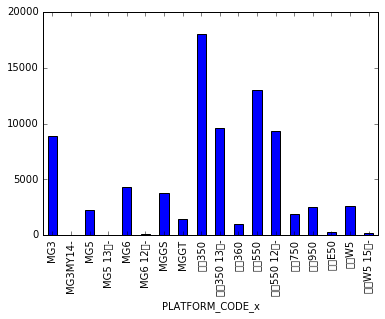

In [35]:
# We want to inspect the distribution for each plat form
platform_groups = raw_data.groupby('PLATFORM_CODE_x',as_index=True).VEHICLE_CODE.count()
print len(platform_groups)
platform_groups.plot.bar()


# Part1. Preprocessing (80% of work)
### Agenda:(from April Chen)
1.1. Basic Data Cleaning
    1. Dealing with data types
    2. Handling missing data
1.2. More Data Exploration
    1. Outlier detection
    2. Plotting distributions
1.3. Feature Engineering
    1. Interactions between features
    2. Dimensionality reduction using PCA
1.4. Feature Selection and Model Building




### 1.1. Basic Data Cleaning
### A. Dealing with data types

- There are three main data types:
    - Numeric, e.g. income, age
    - Categorical, e.g. gender, nationality 
    - Ordinal, e.g. low/medium/high
    
    
- Models can only handle numeric features


- Must convert categorical and ordinal features into numeric features (Encoding categorical features)
    - Create dummy features
    - Transform a categorical feature into a set of dummy features, each representing a unique category
    - In the set of dummy features, 1 indicates that the observation belongs to that category

#### 1) use the get_dummies funtion to tranform the categorical variables into dummy variable with binary values

In [36]:
#show the dummy varibals for the feature '2'(year)
pd.get_dummies(train_data['2'],prefix='2').head(5)

,2_2006.0,2_2008.0,2_2009.0,2_2010.0,2_2011.0,2_2012.0,2_2013.0,2_2014.0,2_2015.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Create a list of features to dummy
# todummy_list = list(train_data.columns)
# # Function to dummy all the categorical variables used for modeling
# def dummy_df(df, todummy_list):
#     for x in todummy_list:
#         dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
#         df = df.drop(x, 1)
#         df = pd.concat([df, dummies], axis=1)
#     return df

#better than just pd.get_dummies
#X_train_dummies= pd.get_dummies(X_train)

In [38]:
# X_train_dummies= dummy_df(train_data,todummy_list)

In [39]:
# print train_data.shape
# print X_train_dummies.shape
# X_train_dummies.head()

#### 2) LabelEncoder and OneHotEncoder
It is used to transform non-numerical labels to numerical labels (or nominal categorical variables). 
Numerical labels are always between 0 and n_classes-1. 
OneHotEncoder takes as input categorical values encoded as integers

In [40]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X_train_label =pd.DataFrame()

# for x in X_train.columns:
    
#     X_train_label[x] = le.fit_transform(train_data[x].astype('str'))

# X_train_label.shape
# X_train_label.head() 


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
# enc = OneHotEncoder()
# enc.fit(df_label)  
# enc.transform(df_label).toarray()

### B1) Handling missing data (for dense train data)

- Models can not handle missing data


- Simplest solution
    - Remove observations/features that have missing data
    

- But, removing missing data can introduce a lot of issues
    - Data is randomly missing: potentially lose a lot of your data
    - Data is non-randomly missing: in addition to losing data, you are also introducing potential biases
    - Usually, this is a poor solution


- An alternative solution is to use imputation
    - Replace missing value with another value
    - Strategies: mean, median, highest frequency value of given feature

### B2) Handling missing data (for sparse train data)
how to deal the missing data, simply using imputation here seems problematic!!!

or then treat the train data as sparse and select the features
seletion the important feature by feature selection algorithm??
#### 1) Transformed into Sparse matrix
#### 2) Feature selection
seletion the important feature by feature selection algorithm



In [43]:
'''
class sklearn.decomposition.SparseCoder(dictionary, transform_algorithm='omp', transform_n_nonzero_coefs=None, transform_alpha=None, split_sign=False, n_jobs=1)[source]

'''

'''
Feature selection is usually used as a pre-processing step before doing the actual learning. 
The recommended way to do this in scikit-learn is to use a sklearn.pipeline.Pipeline:

In this snippet we make use of a sklearn.svm.LinearSVC coupled with sklearn.feature_selection.SelectFromModel to evaluate feature importances 
and select the most relevant features. 
Then, a sklearn.ensemble.RandomForestClassifier is trained on the transformed output, i.e. using only relevant features. 
You can perform similar operations with the other feature selection methods and also classifiers that provide a way to 
evaluate feature importances of course. 
See the sklearn.pipeline.Pipeline examples for more details.
'''

"""
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)
"""

'\nclf = Pipeline([\n  (\'feature_selection\', SelectFromModel(LinearSVC(penalty="l1"))),\n  (\'classification\', RandomForestClassifier())\n])\nclf.fit(X, y)\n'

## One Easy way to deal with missing value in the train data and fealture selection
### from the professional opinions


###  Question: what we can do to the categorical variable and missing value?

### (1) check the nan in the train data in each column 

In [44]:
print train_data.isnull().sum()
train_nan= pd.DataFrame(train_data.isnull().sum()) # tranform the series into a dataframe

#set the threshold for the nan values ,we think the more import the feature is ,the less nan rate it will have 
nan_threshold = len(train_data)*0.1

#show the columuns whose number of nan value is less than 2000, to choose the features in feture
print len(train_nan[train_nan[train_nan.columns[0]]<nan_threshold])
print train_nan[train_nan[train_nan.columns[0]]<nan_threshold]

2        380
3          5
5      79389
6          5
7      38896
A00     1287
A01    79389
A02    79389
A03    79389
A05    79389
A10     1472
A11    62629
A12    66376
A20    72826
A21    79389
A30    32792
A40      468
A90    74780
B00      458
C00      397
C01    79389
C02    42958
C05    79389
C06     7123
C07    79389
C08      647
C09    12142
C0A    68040
C0B    78043
C10     7502
       ...  
T22    76880
U00    12910
U01     4905
U02    79389
U03    42619
U04    42697
U05       10
U06    79389
U09    50434
U0A    36274
U0B    59210
U10    53432
U11     4194
U15    79389
U16    79389
U20    76880
U22    79389
U24    79389
U32    39453
U33    48122
U35     3589
U40    62073
U41    64593
U42    72711
Z00    79389
Z10    39456
Z15    24927
Z16    79389
Z90    79389
Z99    79389
dtype: int64
38
        0
2     380
3       5
6       5
A00  1287
A10  1472
A40   468
B00   458
C00   397
C06  7123
C08   647
C10  7502
D00   725
E00  6978
F10     5
H10     5
J00     5
J15   267
K19  2621
K

### (2) seletion the important and non nan features by nan value rate

In [45]:
train_nan[train_nan[train_nan.columns[0]]< nan_threshold]
feature_list =list(train_nan[train_nan[train_nan.columns[0]]<nan_threshold].index)
feature_list

X_train_nanRate = train_data[feature_list]
#sample train of 2000 observation 
#y_train = raw_data.ix[0:1999,'VEHICLE_CODE']

#the whole train
y_train = raw_data['VEHICLE_CODE']
print X_train_nanRate.shape
print len(y_train)

(79389, 38)
79389


### (3)Encoding the categorical vriables

In [46]:
#use the get_dummies funtion to tranform the categorical variables into dummy variable with binary values
#Create a list of features to dummy
todummy_list = list(X_train_nanRate.columns)
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

#better than just pd.get_dummies

# X_train_dummies= pd.get_dummies(X_train)
X_train_nanRate_dummies = dummy_df(X_train_nanRate,todummy_list)
print X_train_nanRate.shape
X_train_nanRate_dummies.shape
#there is nan value in this dense train data, we need to treat this problem when construct the estimator with imputer method

(79389, 38)


(79389, 201)

In [47]:
X_train_nanRate_dummies.head()

,2_2006.0,2_2008.0,2_2009.0,2_2010.0,2_2011.0,2_2012.0,2_2013.0,2_2014.0,2_2015.0,3_3A17,...,U01_U01X,U05_U054,U05_U056,U05_U057,U05_U058,U05_U05C,U11_U11,U11_U11X,U35_U35R,U35_U35X
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [51]:
#anothter way : use LabelEncoder to transform the categorical varialble to 0 to n-class-1 (or 1 to n-class)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_nanRate_label =pd.DataFrame()

for x in X_train_nanRate.columns:
    # here we alread treat the nan value in the X_train as one kind of value
    X_train_nanRate_label[x] = le.fit_transform(X_train_nanRate[x].astype('str'))

X_train_nanRate_label.shape
#X_train_label    

(79389, 38)

In [52]:
#then use OneHotEncode to encode the label into dummy variable 
enc = OneHotEncoder()
enc.fit(X_train_nanRate_label)  
X_train_nanRate_encoded=enc.transform(X_train_nanRate_label).toarray()

In [53]:
X_train_nanRate_encoded[0,:]
X_train_nanRate_encoded.shape

(79389L, 239L)

In [54]:
# NO need !!!
# #use LabelEncoder to transform the response varialble to 0 to n-class-1 (or 1 to n-class)
# y_le = LabelEncoder()
# y_le.fit(y_train.astype('str'))
# y_le.classes_
# y_train_label = y_le.transform(y_train)


# Impoove Features by adding the feature from the vin code

In [56]:
'''
VIN码详解：
1）1～3位： （WMI：世界制造厂识别代码） 全球制造厂识别码，表示制造厂、品牌和类型；用来标识车辆制造厂的唯一性。通常占VIN代码的前三位；
2) 4～9位（VDS：车辆说明部分）：
说明车辆的一般特性，制造厂不用其中的一位或几位字符，就在该位置填入选定的字母或数字占位，其代号顺序由制造厂确定。
第 4～8位(VDS)：车辆特征
第四位：车身及底盘系列代码
第五位：发动机类型代码
第六～七位：车型代码
第八位：乘员安全保护装置代码

第9位：校验位  通过一定的算法防止输入错误；

3)
第10位：车型年份（ 车型年款代码 ），即厂家规定的型年（Model Year），不一定是实际生产的年份，但一般与实际生产的年份之差不超过1年；
第11位：装配厂（总装工厂代码）；
12～17位： 出厂顺序号代码 ，一般情况下，汽车召回都是针对某一顺序号范围内的车辆，即某一批次的车辆。

'''
# # the features we want to extract fromt the vin code
# features_from_vin = ['vin_code_no4','vin_code_no5','vin_code_no6','vin_code_no7','vin_code_no8','vin_code_no10','vin_code_no11']

# feature_adding = pd.DataFrame(columns=features_from_vin)
# #extract the vin code into a series
# rack_no = raw_data['RACK_NO']

# # # for x in range(len(raw_data)):
# for x in range(10):
#     print rack_no[x]
#     temp=pd.DataFrame(columns=features_from_vin)
   
#     for xx in range(len(features_from_vin)):
#         temp[temp.columns[xx]]=(rack_no[x][xx+3])
#     print temp
#     feature_adding.append(temp)
# #     pd.concat([feature_adding,temp],axis=0)


'\nVIN\xe7\xa0\x81\xe8\xaf\xa6\xe8\xa7\xa3\xef\xbc\x9a\n1\xef\xbc\x891\xef\xbd\x9e3\xe4\xbd\x8d\xef\xbc\x9a \xef\xbc\x88WMI\xef\xbc\x9a\xe4\xb8\x96\xe7\x95\x8c\xe5\x88\xb6\xe9\x80\xa0\xe5\x8e\x82\xe8\xaf\x86\xe5\x88\xab\xe4\xbb\xa3\xe7\xa0\x81\xef\xbc\x89 \xe5\x85\xa8\xe7\x90\x83\xe5\x88\xb6\xe9\x80\xa0\xe5\x8e\x82\xe8\xaf\x86\xe5\x88\xab\xe7\xa0\x81\xef\xbc\x8c\xe8\xa1\xa8\xe7\xa4\xba\xe5\x88\xb6\xe9\x80\xa0\xe5\x8e\x82\xe3\x80\x81\xe5\x93\x81\xe7\x89\x8c\xe5\x92\x8c\xe7\xb1\xbb\xe5\x9e\x8b\xef\xbc\x9b\xe7\x94\xa8\xe6\x9d\xa5\xe6\xa0\x87\xe8\xaf\x86\xe8\xbd\xa6\xe8\xbe\x86\xe5\x88\xb6\xe9\x80\xa0\xe5\x8e\x82\xe7\x9a\x84\xe5\x94\xaf\xe4\xb8\x80\xe6\x80\xa7\xe3\x80\x82\xe9\x80\x9a\xe5\xb8\xb8\xe5\x8d\xa0VIN\xe4\xbb\xa3\xe7\xa0\x81\xe7\x9a\x84\xe5\x89\x8d\xe4\xb8\x89\xe4\xbd\x8d\xef\xbc\x9b\n2) 4\xef\xbd\x9e9\xe4\xbd\x8d\xef\xbc\x88VDS\xef\xbc\x9a\xe8\xbd\xa6\xe8\xbe\x86\xe8\xaf\xb4\xe6\x98\x8e\xe9\x83\xa8\xe5\x88\x86\xef\xbc\x89\xef\xbc\x9a\n\xe8\xaf\xb4\xe6\x98\x8e\xe8\xbd\xa6\xe8\xbe\

In [ ]:
# # combine the fatures from the feature list and vin code
# train_data_combined = feature_adding.append(train_data,axis = 1)
# train_data_CN_combined  = feature_adding.append(train_data_CN,axis=1)

# Pre-Classification by the vin code information and platform imformation
### 1. vin- code NO1-3: to choose which vehicle company it belong：
lsj : 中国上海荣威
### 2. plateform : to choose which plateform it  belong
荣威550：
### more information : to pre-classify the vin code into different prediction model?


raw_data.head()

# Part2: Model  selection and evaluation
### we want to try other models to find the best one

## 2.1 The 1st mode :Random Forest 
### 1) Tuning the parameters with cross-validation
 -- A search consists of:
 - an estimator (regressor or classifier such as sklearn.svm.SVC());
 - a parameter space;
 - a method for searching or sampling candidates;
 - a cross-validation scheme; and
 - a score function.

#### Construct a estimator

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

num_tree =100
# ##becaue when label the featrues into intergers, the nan value in each feature has benn already transfromed into one vule,so we don't need
# ##the imputer function actually.
# estimator = Pipeline([("imputer", Imputer(missing_values=np.nan,
#                                           strategy="most_frequent",
#                                           axis=0)),
#                       ("forest", RandomForestClassifier(random_state=0,
#                                                        n_estimators=num_tree,))])
estimator = RandomForestClassifier(n_estimators=num_tree,n_jobs=-1)

#### Question : is there a problem just substitute the nan value with 'mean'??

#### Acccessing the estimator 

In [ ]:
#using the X_train_dummies as train data of features
from sklearn.cross_validation  import cross_val_score
import sklearn.metrics
# # score = cross_val_score(estimator, X_train_dummies, y_train,scoring=sklearn.metrics.accuracy_score).mean()
score = cross_val_score(estimator, X_train_nanRate_label, y_train,n_jobs=-1).mean()
score

C:\ProgramData\Anaconda3\envs\python27\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


0.62501312904056061

score


In [68]:
score = cross_val_score(estimator, X_train_label, y_train,scoring=sklearn.metrics.accuracy_score).mean()
score

TypeError: Expected sequence or array-like, got estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
vin='LSJW26H38AS072686'
raw_data[raw_data['RACK_NO']==vin]['FEATURE_LIST'].values[0]

'20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC09CC10HC40VC91XD00GD01ME00TE55AF10LF11BF15KG10NH10DH12BH15AJ00FJ05EJ10PJ15AK19AK202K61BL10AL15AL18CL20AM05DM10DM19PM26AM27CM35AM40LM42CM43CN00AN06BN101N13MN22AN50LN62MN68AQ00BQ123Q19RS00PS15DS16DS35SS40PS42AT11AU00LU01UU039U04AU058U11XU35RZ10C'

### Tunning the parameters of RandomForestClassfier
##### two variables： n_estimators && max_features
the number of tree and the random partion of variables && the size of the random subsets of features to consider when splitting a node
max_features=sqrt(n_features) default for classification tasks (where n_features is the number of features in the data)


#### Parallizition :n_jobs=k 
     then computations are partitioned into k jobs, and run on k cores of the machine. 
     If n_jobs=-1 then all cores available on the machine are used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation  import cross_val_score
import sklearn.metrics
num_trees = range(100,2001,100)
n_features = train_data.shape[1]
RandomForestClf_scores =[]

for n in num_trees:
    num_tree = n
    estimator = RandomForestClassifier(n_estimators=num_tree,n_job=-1)
    score = cross_val_score(estimator, X_train_dummies,scoring=sklearn.metrics.accuracy_score, y_train,n_jobs=-1).mean()
    RandomForestClf_scores.append(score)

In [ ]:
#plot the performance for each num of trees


#### Feature Importances
In practice those estimates are stored as an attribute named feature_importances_ on the fitted model. 
This is an array with shape (n_features,) whose values are positive and sum to 1.0. 
The higher the value, the more important is the contribution of the matching feature to the prediction function.

### 2) Model Acccessing 

## 2.2 AdaBoost
### 1) Tuning the parameter with cross-validation


In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation  import cross_val_score

num_trees = range(100,2001,100)
n_features = train_data.shape[1]
AdaBoostClf_scores =[]

for n in num_trees:
    
    num_tree = n
    estimator = AdaBoostClassifier()
    score = cross_val_score(estimator, X_train_dummies, y_train,n_jobs=-1).mean()
    AdaBoostClf_scores.append(score)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 3nd Model:Gradient Tree Boosting¶

# 4th Model: XG booostin

# Testing

In [91]:
#bulid a funciton to interpret a vin code into a feature list by our EPC system
def vinInterpretedToFeatureList(vin):
    #samle is a feature list
    temp_data = pd.DataFrame(np.nan, index=[0],columns=dict_column)
    temp_data_CN = pd.DataFrame(np.nan, index=[0],columns=dict_column)
    
    feature_list = raw_data[raw_data['RACK_NO']==vin]['FEATURE_LIST'].values[0]
    #feature_list = raw_data['FEATURE_LIST'][279]
    # print feature_list
    # print temp_data
    # print type(dict_column)
    # print type(feature_list[0])
    count =0
    for xx in range(0,len(feature_list),4):

        if (feature_list[xx] in ['2','3','5','6','7']) and (count <=6):
            count = count+1
            feature =feature_list[xx]
            feature_code =feature_list[xx:xx+4]
            #print xx,count,feature_code
            #print feature_code

            if tm_feature[tm_feature['FEATURE_CODE']==feature_code].values.shape[0]==0:
                #some feature_code like 76E3 in 279th observation ,but not exsit in the tm_feature['FEATURE_CODE], we assume it is just the correce 
                #feature_code,but fail to find the chinese feature name
                if tm_feature[tm_feature['FEATURE_CODE']==feature_code[0:3]].values.shape[0]==0:
                    temp_data[feature] = np.nan
                    temp_data_CN[feature]= np.nan

                #some feature_code lke G10N in 0th observation, but not exsit in the tm_feature['FEATURE_CODE],
                #we assume it is the same as G10    
                else:
                    temp_data[feature] = feature_code[0:3]
                    temp_data_CN[feature]= feature_code[0:3]

            #print feature_code
            else:
                temp_data[feature] = feature_code
                #print feature_code, tm_feature[tm_feature['FEATURE_CODE']==feature_code]
                temp_data_CN[feature]= tm_feature[tm_feature['FEATURE_CODE']==feature_code].values[(0,4)]
                #.values which change a data frame into np array

        elif any(feature_list[xx:xx+3] == x for x in dict_column):
            #print any(feature_list[xx:xx+3] == x for x in dict_column)
            feature = feature_list[xx:xx+3]
            feature_code = feature_list[xx:xx+4]

            if tm_feature[tm_feature['FEATURE_CODE']==feature_code].values.shape[0]==0:
                #some feature_code like 76E3 in 279th observation ,but not exsit in the tm_feature['FEATURE_CODE], we assume it is just the correce 
                #feature_code,but fail to find the chinese feature name
                if tm_feature[tm_feature['FEATURE_CODE']==feature_code[0:3]].values.shape[0]==0:
                    temp_data[feature] = np.nan
                    temp_data_CN[feature]= np.nan


                #some feature_code lke G10N in 0th observation, but not exsit in the tm_feature['FEATURE_CODE],
                #we assume it is the same as G10    
                else:
                    temp_data[feature] = feature_code[0:3]
                    temp_data_CN[feature]= feature_code[0:3]

            #print feature_code
            else:
                temp_data[feature] = feature_code
                #print feature_code, tm_feature[tm_feature['FEATURE_CODE']==feature_code]
                temp_data_CN[feature]= tm_feature[tm_feature['FEATURE_CODE']==feature_code].values[(0,4)]
                #.values which change a data frame into np array

    return temp_data

vin='LSJW26H38AS072686'
vinInterpretedToFeatureList(vin)
# we can use other 'FEATURE_CN_CHINA' OR 'NUM' HERE   


,2,3,5,6,7,A00,A01,A02,A03,A05,...,U35,U40,U41,U42,Z00,Z10,Z15,Z16,Z90,Z99
0,2009,3A17,NaN,6ASA,76H3,A00U,NaN,NaN,NaN,NaN,...,U35R,NaN,NaN,NaN,NaN,Z10C,NaN,NaN,NaN,NaN


In [92]:
def vinInterpretedToFeatureLables(vin):
    temp_data =vinInterpretedToFeatureList(vin)
    temp_label=pd.DataFrame()
    for x in X_train.columns:
        le = LabelEncoder()
        #we need to use the train data here to transform the data, but acturally we just need the dictory of the feature to transform
        le.fit(X_train[x].astype('str'))
        temp_label[x] = le.transform(temp_data[x])
    return temp_label
        

vinInterpretedToFeatureLables(vin)    
    
    

,2,3,6,7,A00,A10,A40,B00,C00,C06,...,Q19,S00,S15,S35,S40,T11,U01,U05,U11,U35
0,2,0,0,27,11,3,0,0,7,0,...,0,5,3,0,1,0,1,3,1,0


In [93]:
# trainning the estimator with the full train data
clf = RandomForestClassifier(random_state=11,n_estimators=100)
estimator = clf.fit(X_train_label, y_train)


In [94]:
#predict with the estimator
test_vin_feature =vinInterpretedToFeatureLables(vin)
estimator.predict(test_vin_feature)

array(['RWAABD0022'], dtype=object)

In [95]:
def vinEstimator(vin):
    
    test_vin_feature =vinInterpretedToFeatureLables(vin)
    vehicle_code = estimator.predict(test_vin_feature)
    return vehicle_code
    

# input

In [96]:
# while True: 
#     vin_code= raw_input('please input the 17 bits vin code: ') # why I can't use the function input('')
#     #vin_code ='LSJW26H38AS072686'
#     if vin_code == 'quit' or vin_code == 'q':
#         break
# #         print 'hi'

#     elif len(vin_code) != 17:
#         print 'the vin code is not correct'
#     else:
#         vehicle_code_predicted = vinEstimator(vin_code)
#         vehicle_code = raw_data[raw_data['RACK_NO']==vin_code]['VEHICLE_CODE'].values[0] #get the value from a series
#         print 'the predicted vehicle code is '+ vehicle_code_predicted
#         print 'the actual vehicle code is '+vehicle_code
#         if vehicle_code_predicted == vehicle_code:
#             print 'Wow,congratulation!! your prediction is correct!'
#         else:
#             print 'It is a pity, your prediction is wrong!!!'+'\n'
#             print 'if you want to quit,please input: quit or q'+'\n'


In [97]:
vinEstimator('LSJW26H33AS079268')
vinEstimator('LSJW26H36AS082617')

array(['RWAABD0022'], dtype=object)

In [98]:
raw_data[0:2000]

,RACK_NO,VEHICLE_CODE,VEHICLE_MODEL,PLATFORM_CODE_x,FEATURE_LIST_VERSION_ID,NUM,PLATFORM_CODE_y,FEATURE_LIST
0,LSJW26H38AS072686,RWAABD0025,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
1,LSJW26H36AS073027,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
2,LSJW26H34AS080560,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
3,LSJW26H38AS075748,RWAABD0023,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
4,LSJW26H38AS075748,RWAABD0023,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
5,LSJW26H33AS079268,RWAABD0022,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
6,LSJW26H38AS080027,RWAABD0021,荣威CSA7182AC,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
7,LSJW26H38AS080027,RWAABD0021,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
8,LSJW26H36AS089244,RWAABD0023,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...
9,LSJW26H35AS084682,RWAABD0022,荣威CSA7182AC轿车,荣威550,1000036275,809,荣威550,20093A176ASA76H3A00UA10SA40DB00LC00HC06CC08TC0...


# improving the predict model
### one way:     adding into more features from the 17 bits vin code
### another way: using the information from the 17 bits vin code to pre-classify the model
### one way:     selection better classifitor: such as SVM, Nural network,(I dont thing knn will improve the performance,logistics                   classification is for linear boundary) 
                                                                    

# Part3: Model persistence
After training a scikit-learn model, it is desirable to have a way to persist the model for future use without having to retrain. 
The following section gives you an example of how to persist a model with pickle. We’ll also review a few security and maintainability issues when working with pickle serialization.